# OPTICS Clustering and Accuracy Comparison of Various Classifier on UNSW NB15 and IoTID20 Dataset

*by Rakesh Podder, October 20, 2022* 


## Introduction

This project is recreating the ideas from [Arifeen, Murshedul, Petrovski, et al., 2021] I am investigating the works and the techniques that have been used in that paper. I am using various classifiers and other methods to cross verifying which should be perfect classifiers and parameters to achieve the highest accuracy to predict malicious and normal data in the traffic.

#### Concepts and Algorithm:

I want to use OPTICS Clustering Technique for both UNSW-NB15 and IoTID20 datasets. According to [Arifeen, Murshedul, Petrovski, et al., 2021]with min_samples=2, max_eps=np.inf, metric=' chebyshev', cluster_method ='xi' for the OPTICS clustering method's parameters for OPTICS Clustering gives the best results. I want to use different metrics to compare the results. I also want to use different classification Techniques such as simple Logistic Regression,Linear Regression, Gaussian Naive Bayes, Decision Trees, Gradient Boosting, Random Forest (Entropy or Information-gain),Neural Networkm, Support Vector Machine from sklearn library with different Optimizer and Hidden to compare the accuracy for the Classifier. 

I am interested in this dataset and concept because in the end, I want to create some security policies that can restrict the redundant links which will help us to prevent lateral movement in the Network and stop the third-party intrusion.  


#### Dataset:

For the project, I want to take the UNSW-NB15 and loTID20 datasets. These datasets contain various features of network traffic, including anomalous and normal data. The UNSW-NB 15 dataset contains 48 features of the network traffic. The last feature of this dataset is the class label that is either 0 for normal and 1 for malicious traffic. The loTID20 dataset comprises 80 network features including, three class labels. The Normal and Anomaly class are subdivided based on various cyber attacks.

## Methods

| Milestone | Date |
| :- | -: | 
| Understand the dataset and clean the dataset | 11/01/2022 |
| Use Neural Network and different Optimizers and compare accuracy | 11/07/2022 |
| Culster the dataset using OPTICS with various metrics | 11/13/2022 |
| Use Diferent Classifer and compare the accuracy | 11/20/2022 |
| Confision Matrics and Discussion | 11/30/2022 |

### OPTICS Clustering Method (UNSW-NB15)

OPTICS (Ordering Points To Identify the Clustering Structure), closely related to DBSCAN, finds core sample of high density and expands clusters from them [[Ankerst, Mihael, Markus, Breunig, Kriegel, Sander et al., 1999]]. Unlike DBSCAN, keeps cluster hierarchy for a variable neighborhood radius. Better suited for usage on large datasets than the current sklearn implementation of DBSCAN.

Clusters are then extracted using a DBSCAN-like method (cluster_method = ‘dbscan’) or an automatic technique proposed in [[Ankerst, Mihael, Markus, Breunig, Kriegel, Sander et al., 1999]] (cluster_method = ‘xi’).

This implementation deviates from the original OPTICS by first performing k-nearest-neighborhood searches on all points to identify core sizes, then computing only the distances to unprocessed points when constructing the cluster order. Note that we do not employ a heap to manage the expansion candidates, so the time complexity will be O(n^2).

In [1]:
import warnings
warnings.filterwarnings("ignore")
from numpy.random import seed
import tensorflow as tf
tf.random.set_seed(0) 
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import Input,Dropout,Dense
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.utils.data_utils import get_file
from keras.models import model_from_json
%matplotlib inline

2022-12-12 17:41:12.412164: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The "UNSW-NB15_1.csv" file contains total 700000 rows of traffic and it has total 49 columns or attributes. 

In [2]:
path = 'UNSW-NB15_1.csv'
df = pd.read_csv(path)

In [3]:
df.shape

(700001, 49)

#### Pre-Processing the UNSW-NB15 data set

Clean the data set:
 - Drop the unnecessary columns
 - Convert all the non-numeric values into a numeric label
 - Remove the invalid values from the data set
 - Find the high correlation values for reduction
 - PCA for reducing the dimensionality of data.



As you can see, the "UNSW-NB15_1.csv" dataset had various sets of attributes, like a script is the source Ip and sport is the source port and dstip is the destination IP, and port is the destination port. proto stands for a protocol that had been used to send the data. and at the end of the data set, you can find "Label" which informs us if this traffic is malicious or not.

In [4]:
df_new = df.sample(n=1000)
df_new.head(2)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
399859,59.166.0.6,33563,149.171.126.6,80,tcp,FIN,1.004864,1580,10168,31,...,0,1,3,1,1,1,1,1,NaN,0
326179,59.166.0.3,34267,149.171.126.5,53,udp,CON,0.001069,130,162,31,...,0,4,2,6,4,1,1,3,NaN,0


In [5]:
q=df_new['Label']

I am dropping the attack_cat and Label column from the Dataset.

In [6]:
df_new = df_new.drop(['attack_cat','Label'],axis=1)
df_new.head(2)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
399859,59.166.0.6,33563,149.171.126.6,80,tcp,FIN,1.004864,1580,10168,31,...,1,0,0,1,3,1,1,1,1,1
326179,59.166.0.3,34267,149.171.126.5,53,udp,CON,0.001069,130,162,31,...,0,0,0,4,2,6,4,1,1,3


cat_feature contains all the non-numeric columnns. 

In [7]:
cat_feature = df_new.select_dtypes(include=['category', object]).columns
cat_feature

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service'], dtype='object')

Now, I am using a library called "LabelEncoder" from sklearn. preprocessing that will convert all the non-numeric values into a numeric label so that we can use the data for CLUSTERING and CLASSIFIER.

In [8]:
from sklearn.preprocessing import LabelEncoder
df_new[cat_feature] = df_new[cat_feature].astype(str)
df_new[cat_feature] = df_new[cat_feature].apply(LabelEncoder().fit_transform)
df_new.head(3)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
399859,19,405,19,412,6,2,1.004864,1580,10168,31,...,1,0,0,1,3,1,1,1,1,1
326179,16,412,18,327,7,1,0.001069,130,162,31,...,0,0,0,4,2,6,4,1,1,3
94953,10,13,13,327,7,3,0.000012,114,0,254,...,0,0,0,10,10,3,3,3,3,3


In [9]:
df_new = df_new.replace([np.inf, -np.inf], np.nan).dropna()
df_new.head(3)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
399859,19,405,19,412,6,2,1.004864,1580,10168,31,...,1,0,0,1,3,1,1,1,1,1
326179,16,412,18,327,7,1,0.001069,130,162,31,...,0,0,0,4,2,6,4,1,1,3
94953,10,13,13,327,7,3,0.000012,114,0,254,...,0,0,0,10,10,3,3,3,3,3


Compute pairwise correlation of columns, excluding NA/null values.

In [10]:
df_corr = df_new.corr()

Finding the high Correlation values in the dataset.

In [11]:
high_corr_var=np.where(df_corr>0.95)

In [12]:
high_corr_var=[(df_corr.columns[x],df_corr.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [13]:
high_corr_var

[('dbytes', 'dloss'),
 ('dbytes', 'Dpkts'),
 ('dloss', 'Dpkts'),
 ('Spkts', 'Dpkts'),
 ('swin', 'dwin'),
 ('Stime', 'Ltime'),
 ('tcprtt', 'synack'),
 ('tcprtt', 'ackdat')]

In [14]:
import seaborn as sns

Heatmap of the corelation values of various atrributes of the dataset.

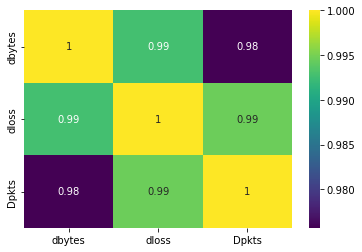

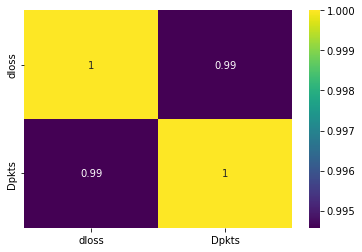

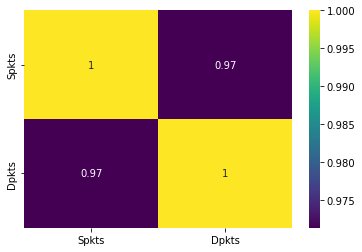

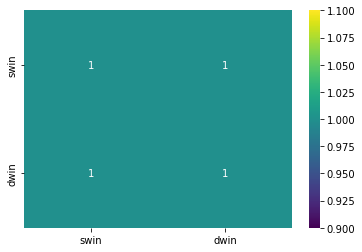

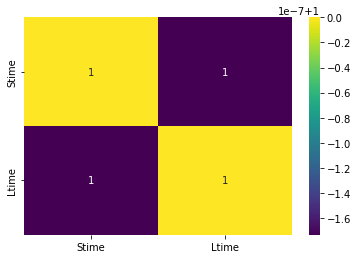

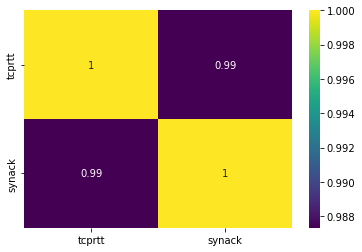

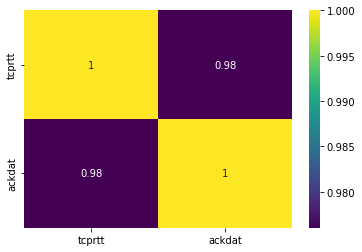

In [15]:
sns.heatmap(df_new[['dbytes','dloss','Dpkts']].corr(), annot=True, cmap=plt.cm.viridis)
plt.show()
sns.heatmap(df_new[['dloss','Dpkts']].corr(), annot=True, cmap=plt.cm.viridis)
plt.show()
sns.heatmap(df_new[['Spkts','Dpkts']].corr(), annot=True, cmap=plt.cm.viridis)
plt.show()

sns.heatmap(df_new[['swin','dwin']].corr(), annot=True, cmap=plt.cm.viridis)
plt.show()
sns.heatmap(df_new[['Stime','Ltime']].corr(), annot=True, cmap=plt.cm.viridis)
plt.show()
sns.heatmap(df_new[['tcprtt','synack']].corr(), annot=True, cmap=plt.cm.viridis)
plt.show()
sns.heatmap(df_new[['tcprtt','ackdat']].corr(), annot=True, cmap=plt.cm.viridis)
plt.show()

As you can see from the heatmap, Swin and Stime have a corelation value of 1. So, we are dropping the cloumns from our dataset.

In [16]:
df_new = df_new.drop(['swin','Stime' ],axis=1)

In [17]:
df_new.head(2)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
399859,19,405,19,412,6,2,1.004864,1580,10168,31,...,1,0,0,1,3,1,1,1,1,1
326179,16,412,18,327,7,1,0.001069,130,162,31,...,0,0,0,4,2,6,4,1,1,3


In [18]:
from sklearn.preprocessing import StandardScaler
x=df_new.values
x = StandardScaler().fit_transform(x)

Note: The Principal Component Analysis is a popular unsupervised learning technique for reducing the dimensionality of data. It increases interpretability yet, at the same time, it minimizes information loss [Howley, Tom, et al.]. It helps to find the most significant features in a dataset and makes the data easy for plotting in 2D and 3D. The improved DBSCAN algorithm is called OPTICS. DBSCAN outperforms other methods when it comes to clustering network traffic, [Erman, Arlitt, Arlitt, et al., 20006]. OPTICS, in contrast to DBSCAN, is more effective with large datasets [optics] and does not call for the epsilon parameter (the domain knowledge). These factors led me to select the OPTICS clustering algorithm in this instance.

Text(0, 0.5, 'cumulative explained variance')

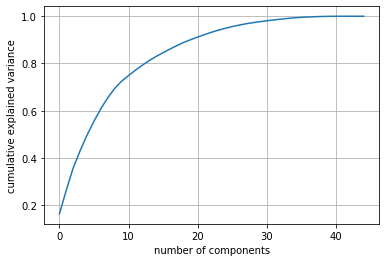

In [19]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA().fit(x)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [20]:
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5', 'principal component 6','principal component 7', 'principal component 8','principal component 9', 'principal component 10','principal component 11', 'principal component 12','principal component 13', 'principal component 14','principal component 15', 'principal component 16','principal component 17', 'principal component 18','principal component 19', 'principal component 20','principal component 21', 'principal component 22','principal component 23', 'principal component 24','principal component 25','principal component 26','principal component 27', 'principal component 28','principal component 29','principal component 30'])

In [21]:
y=principalDf.values

In [22]:
from sklearn.cluster import OPTICS
clustering = OPTICS(min_samples=2,max_eps=np.inf,metric='chebyshev',cluster_method='xi').fit(y)

In [23]:
labels=clustering.labels_
len(labels)

1000

In [24]:
no_clusters = len(np.unique(labels))
no_clusters

198

In [25]:
no_noise = np.sum(np.array(labels) == -1, axis=0)
no_noise

468

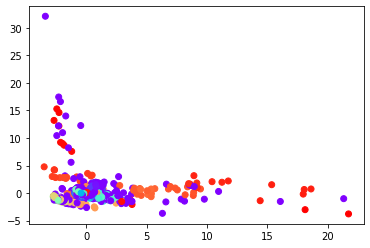

In [26]:
plt.scatter(y[:,0],y[:,1], c = labels, cmap='rainbow')#c = labels

In [27]:
index_cluster_0=np.where(labels==0)[0]
index_cluster_0

array([  0, 186, 377])

In [28]:
index_cluster_1=np.where(labels==1)[0]
index_cluster_1

array([ 91, 720, 872])

In [29]:
index_cluster_2=np.where(labels==2)[0]
index_cluster_2

array([106, 185, 826])

In [30]:
index_cluster_3=np.where(labels==3)[0]
index_cluster_3

array([311, 983])

In [31]:
index_cluster_4=np.where(labels==4)[0]
index_cluster_4

array([508, 986])

In [32]:
from sklearn.metrics import homogeneity_score

Note:

I am using Homogeneity Score to check whether the clustering algorithm meets an important requirement: a cluster should contain only samples belonging to a single class. 

In [33]:
homogeneity_score(q, labels)

0.6807621161500969

### OPTICS Clustering with Different Parameter

In [34]:
clustering2 = OPTICS(min_samples=2,max_eps=np.inf,metric='minkowski',cluster_method='xi').fit(y)

In [35]:
labels=clustering2.labels_
labels

array([  0,  -1, 163,  -1,  76,  89, 148,  12,  85,  -1,  -1,  -1,  -1,
        -1,  97,  -1,  -1,  -1,  -1,  -1, 125, 143,  -1,   8, 118,  -1,
        -1,  -1,  -1,  40,  60,  71, 173,  -1,  -1,  -1,  -1,  -1,  -1,
         4, 159, 153,  -1,  -1,  13,  -1,  -1,  -1, 167,  -1,  58, 169,
        24,  -1,  -1,   5,   8,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  41,  20,  -1,  -1, 160,   4,  -1,  -1,  41,
        -1,  -1,  98,  -1,  -1,  99,  54, 154,  71,  -1,  -1, 103,  -1,
         3,  -1,  -1,  49,  22,  23,  -1, 143,  69,  -1, 163,  -1,  -1,
        -1,  93,   5,  -1, 130,  -1,  -1,  -1, 140,  -1, 179, 155,  -1,
        -1, 163,  32,  26,  -1,  70, 120,  -1, 142,  26,  -1,  51,   7,
        -1,  -1, 159,  16,  68,  -1,  -1,  92,  -1,  70,  -1, 159, 146,
        70,  -1,  -1,  95,  24, 127,  -1, 176,  23, 123, 115,  -1,  79,
        -1,  84,  -1,  -1,  -1, 137,  53,  14,  60,  -1, 164,  38, 159,
        -1,  -1,  -1,  -1,  -1,  94,  -1,  -1, 146,  38,  15, 13

In [36]:
no_clusters = len(np.unique(labels))
no_clusters

181

In [37]:
no_noise = np.sum(np.array(labels) == -1, axis=0)
no_noise

494

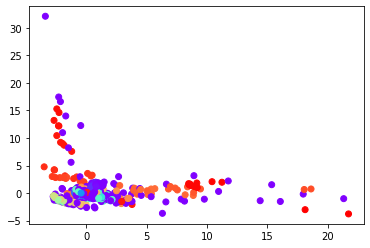

In [38]:
plt.scatter(y[:,0],y[:,1], c = labels, cmap='rainbow')#c = labels

In [39]:
homogeneity_score(q, labels)

0.8412584968442263

In [40]:
clustering3 = OPTICS(min_samples=2,max_eps=np.inf,metric='correlation',cluster_method='xi').fit(y)

In [41]:
labels=clustering3.labels_

In [42]:
no_clusters = len(np.unique(labels))
no_clusters

226

In [43]:
no_noise = np.sum(np.array(labels) == -1, axis=0)
no_noise

373

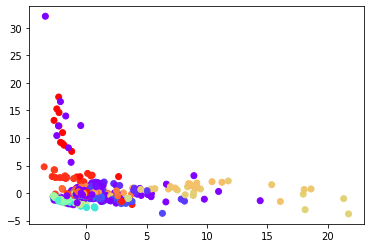

In [44]:
plt.scatter(y[:,0],y[:,1], c = labels, cmap='rainbow')#c = labels

In [45]:
homogeneity_score(q, labels)

0.7755033538266819

## Classification

According to the references, I am classifying the malicious and normal data using the DT classifier. Then I am using various other classifiers to check whether I can get a better prediction result.

### Preprocessing the data

In [46]:
data = pd.read_csv(r'UNSW-NB15_1.csv')
data.head(5)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


"UNSW-NB15_2" is the second dataset from UNSW. I am using it dataset for prediction perpose.

In [47]:
data2 = pd.read_csv(r'UNSW-NB15_2.csv')
data2.head(5)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,6055,149.171.126.5,54145,tcp,FIN,0.072974,4238,60788,31,...,0,13,13,6,7,1,1,2,NaN,0
1,59.166.0.0,7832,149.171.126.3,5607,tcp,FIN,0.144951,5174,91072,31,...,0,13,13,6,7,1,1,2,NaN,0
2,59.166.0.8,11397,149.171.126.6,21,tcp,FIN,0.116107,2934,3742,31,...,1,1,2,7,5,1,1,4,NaN,0
3,59.166.0.0,3804,149.171.126.3,53,udp,CON,0.000986,146,178,31,...,0,13,13,6,7,1,1,2,NaN,0
4,59.166.0.8,14339,149.171.126.6,14724,tcp,FIN,0.038480,8928,320,31,...,0,8,20,7,5,1,1,4,NaN,0


In [48]:
data3 = pd.read_csv(r'UNSW-NB15_3.csv')
data3.head(5)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_0ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,0,6,2,2,5,1,1,2,NaN,0
1,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,...,0,3,5,2,4,1,1,4,NaN,0
2,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,...,0,3,5,1,1,1,1,3,NaN,0
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,0,19,19,19,19,19,19,19,NaN,0
4,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,0,19,19,19,19,19,19,19,NaN,0


In [49]:
df_new =data
df_new.head(2)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0


In [50]:
df_new= df_new.drop(['attack_cat'],axis=1)

In [51]:
df2_new = data2
df3_new = data3

In [52]:
df2_new= df2_new.drop(['attack_cat'],axis=1)
df3_new= df3_new.drop(['attack_cat'],axis=1)

In [53]:
df_new.head(2)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,0,3,7,1,3,1,1,1,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,0,2,4,2,3,1,1,2,0


In [54]:
df2_new.head(2)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,59.166.0.0,6055,149.171.126.5,54145,tcp,FIN,0.072974,4238,60788,31,...,0.0,0,13,13,6,7,1,1,2,0
1,59.166.0.0,7832,149.171.126.3,5607,tcp,FIN,0.144951,5174,91072,31,...,0.0,0,13,13,6,7,1,1,2,0


In [55]:
df3_new.head(2)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_0ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,0,0,6,2,2,5,1,1,2,0
1,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,...,0,0,3,5,2,4,1,1,4,0


#### Label Encoder

In [56]:
from sklearn.preprocessing import LabelEncoder
cat_feature = df_new.select_dtypes(include=['category', object]).columns
cat_feature

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service'], dtype='object')

In [57]:
cat_feature2 = df2_new.select_dtypes(include=['category', object]).columns
cat_feature2

Index(['srcip', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd'], dtype='object')

In [58]:
cat_feature3 = df3_new.select_dtypes(include=['category', object]).columns
cat_feature3

Index(['srcip', 'dstip', 'dsport', 'proto', 'state', 'service'], dtype='object')

In [59]:
class MultiColumnLabelEncoder:

    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode


    def fit(self, X, y=None):
        self.encoders = {}
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self


    def transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(X[col])
        return output


    def fit_transform(self, X, y=None):
        return self.fit(X,y).transform(X)


    def inverse_transform(self, X):
        output = X.copy()
        columns = X.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(X[col])
        return output

In [60]:
multi = MultiColumnLabelEncoder(cat_feature)

In [61]:
multi2 = MultiColumnLabelEncoder(cat_feature2)

In [62]:
multi3 = MultiColumnLabelEncoder(cat_feature3)

In [63]:
df_new[cat_feature] = df_new[cat_feature].astype(str)

In [64]:
df2_new[cat_feature2] = df2_new[cat_feature2].astype(str)

In [65]:
df3_new[cat_feature3] = df3_new[cat_feature3].astype(str)

In [66]:
df_new = multi.fit_transform(df_new)

In [67]:
df2_new = multi2.fit_transform(df2_new)

In [68]:
df3_new = multi3.fit_transform(df3_new)

In [69]:
df_new.head(3)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,30,4272,22,45600,120,2,0.001055,132,164,31,...,0,0,3,7,1,3,1,1,1,0
1,30,26018,25,239,120,2,0.036133,528,304,31,...,0,0,2,4,2,3,1,1,2,0
2,36,5087,23,45600,120,2,0.001119,146,178,31,...,0,0,12,8,1,2,2,1,1,0


In [70]:
df2_new.head(3)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,30,6055,22,46583,113,5,0.072974,4238,60788,31,...,0.0,1,13,13,6,7,1,1,2,0
1,30,7832,20,48619,113,5,0.144951,5174,91072,31,...,0.0,1,13,13,6,7,1,1,2,0
2,38,11397,23,11659,113,5,0.116107,2934,3742,31,...,1.0,2,1,2,7,5,1,1,4,0


In [71]:
df3_new.head(3)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_0ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,31,18247,21,55973,113,4,0.119596,4550,68342,31,...,0,0,6,2,2,5,1,1,2,0
1,33,54771,19,17535,113,4,0.650574,8928,320,31,...,0,0,3,5,2,4,1,1,4,0
2,38,13289,26,41434,113,4,0.007980,2158,2464,31,...,0,0,3,5,1,1,1,1,3,0


In [72]:
rev_df = multi.inverse_transform(df_new)

In [73]:
rev_df2 = multi2.inverse_transform(df2_new)

In [74]:
rev_df3 = multi3.inverse_transform(df3_new)

In [75]:
rev_df

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,0,3,7,1,3,1,1,1,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,0,2,4,2,3,1,1,2,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,0,12,8,1,2,2,1,1,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,0,6,9,1,1,1,1,1,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,0,7,9,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,59.166.0.8,12520,149.171.126.6,31010,tcp,FIN,0.020383,320,1874,31,...,0,0,8,20,7,5,1,1,4,0
699997,59.166.0.0,18895,149.171.126.9,80,tcp,FIN,1.402957,19410,1087890,31,...,0,0,1,1,2,7,2,2,2,0
699998,59.166.0.0,30103,149.171.126.5,5190,tcp,FIN,0.007108,2158,2464,31,...,0,0,13,13,6,7,2,1,2,0
699999,59.166.0.6,30388,149.171.126.5,111,udp,CON,0.004435,568,304,31,...,0,0,10,13,6,5,1,1,3,0


In [76]:
rev_df2

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,59.166.0.0,6055,149.171.126.5,54145,tcp,FIN,0.072974,4238,60788,31,...,0.0,0,13,13,6,7,1,1,2,0
1,59.166.0.0,7832,149.171.126.3,5607,tcp,FIN,0.144951,5174,91072,31,...,0.0,0,13,13,6,7,1,1,2,0
2,59.166.0.8,11397,149.171.126.6,21,tcp,FIN,0.116107,2934,3742,31,...,1.0,1,1,2,7,5,1,1,4,0
3,59.166.0.0,3804,149.171.126.3,53,udp,CON,0.000986,146,178,31,...,0.0,0,13,13,6,7,1,1,2,0
4,59.166.0.8,14339,149.171.126.6,14724,tcp,FIN,0.038480,8928,320,31,...,0.0,0,8,20,7,5,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,NaN,,19,19,19,19,19,19,19,0
699997,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,NaN,,19,19,19,19,19,19,19,0
699998,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,NaN,,19,19,19,19,19,19,19,0
699999,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,NaN,,19,19,19,19,19,19,19,0


In [77]:
rev_df3

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_0ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,0,0,6,2,2,5,1,1,2,0
1,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,...,0,0,3,5,2,4,1,1,4,0
2,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,...,0,0,3,5,1,1,1,1,3,0
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,0,0,19,19,19,19,19,19,19,0
4,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,0,0,19,19,19,19,19,19,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,59.166.0.0,2111,149.171.126.5,53,udp,CON,0.001035,146,178,31,...,0,0,1,3,4,3,1,1,4,0
699997,59.166.0.5,49044,149.171.126.3,30639,tcp,FIN,0.220630,424,8824,31,...,0,0,3,3,3,3,1,1,4,0
699998,59.166.0.6,37717,149.171.126.7,35667,tcp,FIN,0.031576,2646,25564,31,...,0,0,7,6,7,4,1,1,3,0
699999,59.166.0.2,1768,149.171.126.7,64122,tcp,FIN,0.096835,4862,82782,31,...,0,0,6,6,7,7,1,1,2,0


In [78]:
df_new = df_new.replace([np.inf, -np.inf], np.nan).dropna()
df_new.head(3)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,30,4272,22,45600,120,2,0.001055,132,164,31,...,0,0,3,7,1,3,1,1,1,0
1,30,26018,25,239,120,2,0.036133,528,304,31,...,0,0,2,4,2,3,1,1,2,0
2,36,5087,23,45600,120,2,0.001119,146,178,31,...,0,0,12,8,1,2,2,1,1,0


In [79]:
df2_new = df2_new.replace([np.inf, -np.inf], np.nan).dropna()
df2_new.head(3)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,30,6055,22,46583,113,5,0.072974,4238,60788,31,...,0.0,1,13,13,6,7,1,1,2,0
1,30,7832,20,48619,113,5,0.144951,5174,91072,31,...,0.0,1,13,13,6,7,1,1,2,0
2,38,11397,23,11659,113,5,0.116107,2934,3742,31,...,1.0,2,1,2,7,5,1,1,4,0


In [80]:
df3_new = df3_new.replace([np.inf, -np.inf], np.nan).dropna()
df3_new.head(3)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_0ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,31,18247,21,55973,113,4,0.119596,4550,68342,31,...,0,0,6,2,2,5,1,1,2,0
1,33,54771,19,17535,113,4,0.650574,8928,320,31,...,0,0,3,5,2,4,1,1,4,0
2,38,13289,26,41434,113,4,0.007980,2158,2464,31,...,0,0,3,5,1,1,1,1,3,0


In [81]:
df_new = df_new.drop(['swin', 'Stime'], axis=1)

In [82]:
df2_new = df2_new.drop(['swin', 'Stime'], axis=1)

In [83]:
df3_new = df3_new.drop(['swin', 'Stime'], axis=1)

In [84]:
df_new.shape

(700001, 46)

In [85]:
from sklearn.model_selection import train_test_split
y = df_new.Label
X = df_new.drop(['Label'],axis=1)

In [86]:
y2 = df2_new.Label
X2 = df2_new.drop(['Label'],axis=1)

In [87]:
y3 = df3_new.Label
X3 = df3_new.drop(['Label'],axis=1)

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [89]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((490000, 45), (210001, 45), (490000,), (210001,))

### Decision Tree(DT)

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [92]:
dt_score = dt.score(X_test,y_test)
dt_score

0.9983428650339761

In [93]:
dt.score(X2,y2)

0.9999922521061358

In [94]:
dt.score(X3,y3)

0.964902907281561

In [95]:
y_pred = dt.predict(X_test)

In [96]:
y2_pred = dt.predict(X2)

In [97]:
y3_pred = dt.predict(X3)

In [98]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [99]:
y2_pred

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
y3_pred

array([0, 0, 0, ..., 0, 0, 0])

In [101]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[203113    162]
 [   186   6540]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203275
           1       0.98      0.97      0.97      6726

    accuracy                           1.00    210001
   macro avg       0.99      0.99      0.99    210001
weighted avg       1.00      1.00      1.00    210001



In [102]:
print(confusion_matrix(y2, y2_pred))
print(classification_report(y2, y2_pred))

[[387199      3]
 [     0      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    387202
           1       0.00      0.00      0.00         0

    accuracy                           1.00    387202
   macro avg       0.50      0.50      0.50    387202
weighted avg       1.00      1.00      1.00    387202



In [103]:
print(confusion_matrix(y3, y3_pred))
print(classification_report(y3, y3_pred))

[[534192   8384]
 [ 16184 141241]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    542576
           1       0.94      0.90      0.92    157425

    accuracy                           0.96    700001
   macro avg       0.96      0.94      0.95    700001
weighted avg       0.96      0.96      0.96    700001



In [104]:
from sklearn.metrics import confusion_matrix

In [105]:
cf_matrix= confusion_matrix(y_test, y_pred)
cf_matrix

array([[203113,    162],
       [   186,   6540]])

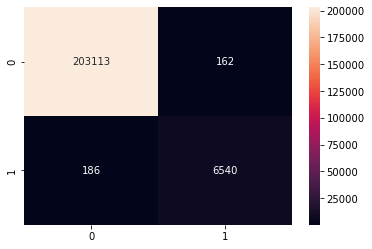

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
# group_names = ['True Neg','False Pos','False Neg','True Pos']
# group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
# labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
# labels = np.asarray(labels).reshape(2,2)


sns.heatmap(cf_matrix, annot=True, fmt='')
plt.savefig("plots_UNSW.pdf")

In [107]:
cf_matrix2 = confusion_matrix(y2, y2_pred)
cf_matrix2

array([[387199,      3],
       [     0,      0]])

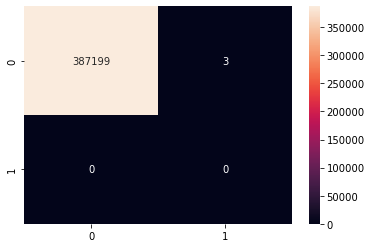

In [108]:
sns.heatmap(cf_matrix2, annot=True, fmt='')
plt.savefig("plots_UNSW2.pdf")

In [109]:
cf_matrix3 = confusion_matrix(y3, y3_pred)
cf_matrix3

array([[534192,   8384],
       [ 16184, 141241]])

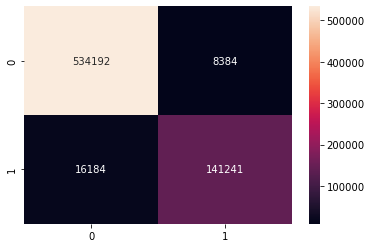

In [110]:
sns.heatmap(cf_matrix3, annot=True, fmt='')
plt.savefig("plots_UNSW3.pdf")

In [111]:
df_new.shape

(700001, 46)

In [112]:
X.shape

(700001, 45)

In [113]:
X_test[:10]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
381464,32,27652,20,45600,120,2,0.001088,130,162,31,...,0,0,0,7,3,2,7,2,1,1
457927,36,54678,20,60303,114,5,1.366924,1580,10168,31,...,6,0,0,13,7,7,8,3,3,3
18536,36,20858,19,60303,114,5,4.259284,17538,1087890,31,...,1,0,0,1,2,3,1,1,1,1
689080,35,6393,24,60303,114,5,1.010248,1684,10168,31,...,1,0,0,12,16,4,1,1,1,1
681623,37,14726,23,12277,114,5,0.039882,3390,44832,31,...,0,0,0,11,5,2,6,1,1,1
263626,32,46465,7,60303,114,5,4.337726,15874,1059390,31,...,1,0,0,2,1,5,4,1,1,1
147073,30,54429,21,15932,114,5,0.498523,37430,3276,31,...,0,0,0,20,8,1,8,1,1,1
48234,32,63355,25,15932,114,5,0.674795,37938,3276,31,...,0,0,0,1,1,3,1,1,1,1
595563,30,13623,19,52499,120,2,0.124114,512,304,31,...,0,0,0,7,17,5,6,1,1,4
288165,31,10026,20,29444,114,5,0.022873,2750,26406,31,...,0,0,0,3,5,2,2,1,1,1


In [114]:
rev_Xtest = multi.inverse_transform(X_test)

In [115]:
rev_X2 = multi2.inverse_transform(X2)

In [116]:
rev_X3 = multi3.inverse_transform(X3)

In [117]:
rev_Xtest

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
381464,59.166.0.2,35147,149.171.126.4,53,udp,CON,0.001088,130,162,31,...,0,0,0,7,3,2,7,2,1,1
457927,59.166.0.6,59713,149.171.126.4,80,tcp,FIN,1.366924,1580,10168,31,...,6,0,0,13,7,7,8,3,3,3
18536,59.166.0.6,28971,149.171.126.3,80,tcp,FIN,4.259284,17538,1087890,31,...,1,0,0,1,2,3,1,1,1,1
689080,59.166.0.5,15827,149.171.126.8,80,tcp,FIN,1.010248,1684,10168,31,...,1,0,0,12,16,4,1,1,1,1
681623,59.166.0.7,23398,149.171.126.7,21546,tcp,FIN,0.039882,3390,44832,31,...,0,0,0,11,5,2,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465417,59.166.0.1,58924,149.171.126.7,80,tcp,FIN,1.292933,3264,20336,31,...,36,0,0,28,15,17,24,17,17,17
294996,59.166.0.8,2015,149.171.126.8,5190,tcp,FIN,0.005676,2062,2424,31,...,0,0,0,5,9,5,3,1,1,2
261866,59.166.0.6,59012,149.171.126.5,17181,tcp,FIN,0.040686,3926,51770,31,...,0,0,0,4,4,3,2,1,1,1
342387,59.166.0.0,2543,149.171.126.8,49954,tcp,FIN,0.220899,8928,320,31,...,0,0,0,2,2,5,7,1,1,3


In [118]:
rev_X2

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,59.166.0.0,6055,149.171.126.5,54145,tcp,FIN,0.072974,4238,60788,31,...,0.0,0.0,0,13,13,6,7,1,1,2
1,59.166.0.0,7832,149.171.126.3,5607,tcp,FIN,0.144951,5174,91072,31,...,0.0,0.0,0,13,13,6,7,1,1,2
2,59.166.0.8,11397,149.171.126.6,21,tcp,FIN,0.116107,2934,3742,31,...,0.0,1.0,1,1,2,7,5,1,1,4
3,59.166.0.0,3804,149.171.126.3,53,udp,CON,0.000986,146,178,31,...,0.0,0.0,0,13,13,6,7,1,1,2
4,59.166.0.8,14339,149.171.126.6,14724,tcp,FIN,0.038480,8928,320,31,...,0.0,0.0,0,8,20,7,5,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387197,59.166.0.6,8647,149.171.126.8,25,tcp,CON,0.308446,31366,2566,31,...,0.0,0.0,0,1,1,2,1,1,1,1
387198,59.166.0.2,4681,149.171.126.1,5190,tcp,FIN,0.006390,2054,2478,31,...,0.0,0.0,0,2,4,1,3,1,1,1
387199,59.166.0.2,47560,149.171.126.2,6125,tcp,FIN,0.222470,8928,320,31,...,0.0,0.0,0,3,3,2,3,1,1,2
387200,59.166.0.3,11047,149.171.126.5,80,tcp,CON,0.004158,890,8896,31,...,1.0,0.0,0,1,1,2,2,1,1,2


In [119]:
rev_X3

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_0ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,0,0,0,6,2,2,5,1,1,2
1,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,...,0,0,0,3,5,2,4,1,1,4
2,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,...,0,0,0,3,5,1,1,1,1,3
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,0,0,0,19,19,19,19,19,19,19
4,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,0,0,0,19,19,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,59.166.0.0,2111,149.171.126.5,53,udp,CON,0.001035,146,178,31,...,0,0,0,1,3,4,3,1,1,4
699997,59.166.0.5,49044,149.171.126.3,30639,tcp,FIN,0.220630,424,8824,31,...,0,0,0,3,3,3,3,1,1,4
699998,59.166.0.6,37717,149.171.126.7,35667,tcp,FIN,0.031576,2646,25564,31,...,0,0,0,7,6,7,4,1,1,3
699999,59.166.0.2,1768,149.171.126.7,64122,tcp,FIN,0.096835,4862,82782,31,...,0,0,0,6,6,7,7,1,1,2


In [120]:
rev_Xtest['Actual Label'] = y_test

In [121]:
rev_X2['Actual Label'] = y2

In [122]:
rev_X3['Actual Label'] = y3

In [123]:
rev_Xtest['Predicted Label'] = y_pred

In [124]:
rev_X2['Predicted Label'] = y2_pred

In [125]:
rev_X3['Predicted Label'] = y3_pred

In [126]:
rev_Xtest_miss = rev_Xtest[rev_Xtest['Predicted Label'] != rev_Xtest['Actual Label']]

In [127]:
rev_X2_miss = rev_X2[rev_X2['Predicted Label'] != rev_X2['Actual Label']]

In [128]:
rev_X3_miss = rev_X3[rev_X3['Predicted Label'] != rev_X3['Actual Label']]

In [129]:
rev_Xtest_miss

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Actual Label,Predicted Label
17587,175.45.176.3,9509,149.171.126.14,80,tcp,FIN,1.985191,68187,612,254,...,0,2,1,1,2,1,1,1,0,1
104184,175.45.176.0,1260,149.171.126.12,3306,tcp,FIN,0.587018,608,646,254,...,0,2,5,2,1,1,1,1,0,1
35765,175.45.176.1,41417,149.171.126.13,520,udp,INT,52.377636,156,0,254,...,0,14,5,1,6,1,1,1,1,0
158897,175.45.176.3,45700,149.171.126.17,514,udp,INT,0.000011,424,0,254,...,0,8,2,1,3,1,1,1,1,0
128304,175.45.176.3,2142,149.171.126.14,445,tcp,FIN,0.729771,1014,842,254,...,0,4,5,2,2,2,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124993,175.45.176.3,45850,149.171.126.15,80,tcp,FIN,0.927728,68191,612,254,...,0,1,1,1,1,1,1,1,0,1
140242,175.45.176.3,42548,149.171.126.11,1723,tcp,FIN,0.916815,708,268,254,...,0,6,6,1,2,1,1,1,0,1
9105,175.45.176.0,28771,149.171.126.12,179,tcp,FIN,0.718466,574,354,254,...,0,4,4,1,1,1,1,1,1,0
34397,175.45.176.1,62627,149.171.126.13,520,udp,INT,0.000003,78,0,254,...,0,13,7,1,1,1,1,1,1,0


I am saving the wrong predicted data so that we can understand which attribute is the cause of the wrong prediction. It will help for further analysis to determine better results and consequences of the wrong prediction on the Network.

In [130]:
rev_Xtest_miss.to_csv('Worng_Predicted_Label.csv', index=False)

In [131]:
rev_X2_miss.to_csv('Worng_Predicted_Label_2.csv', index=False)

In [132]:
rev_X3_miss.to_csv('Worng_Predicted_Label_3.csv', index=False)

### Different Machine Learning Models:
   
This is a Classification problem where we want to detect whether there is an attack or not.

We will use:
<ul>
    <li>
        Logistic Regression.
    </li>
        <li>
            Linear Regresion
    </li>
        <li>
            Decision Trees
    </li>
        <li>
           Random Forest 
    </li>
        <li>
        Neural Network
    </li>
        <li>
        Gaussian Naive Bayes
    </li>
        <li>
        Gradient Boosting
    </li>
    <li>
        SVM
    </li>
    </ul>

### Logistic Regression

In [133]:
import warnings
warnings.filterwarnings('ignore')

In [134]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train,y_train)
lr_score = lr.score(X_test,y_test)
lr_score

0.9678906290922424

### Linear Regression

In [135]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)
reg_score = reg.score(X_test,y_test)
reg_score

0.7749400997207507

### Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.[Random Forest].

In [136]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
rnd.fit(X_train,y_train)
rnd_score = rnd.score(X_test,y_test)
rnd_score

0.9986571492516703

### Neural Network

This model optimizes the log-loss function using LBFGS or stochastic gradient descent.[Nerual Network].

In [137]:
nnet_list = []

In [138]:
from sklearn.neural_network import MLPClassifier
nnet = MLPClassifier(hidden_layer_sizes = (20,10), activation='relu', solver='adam')
nnet.fit(X_train,y_train)
nnet_score = nnet.score(X_test,y_test)
nnet_list.append(nnet_score)
nnet_score

0.9679715810877091

In [139]:
from sklearn.neural_network import MLPClassifier
nnet = MLPClassifier(hidden_layer_sizes = (20,50,20), activation='relu', solver='adam')
nnet.fit(X_train,y_train)
nnet_score = nnet.score(X_test,y_test)
nnet_list.append(nnet_score)
nnet_score

0.9679715810877091

In [140]:
from sklearn.neural_network import MLPClassifier
nnet = MLPClassifier(hidden_layer_sizes = (20,10,20), activation='tanh', solver='adam')
nnet.fit(X_train,y_train)
nnet_score = nnet.score(X_test,y_test)
nnet_list.append(nnet_score)
nnet_score

0.9679715810877091

In [141]:
from sklearn.neural_network import MLPClassifier
nnet = MLPClassifier(hidden_layer_sizes = (20,10), activation='relu', solver='sgd')
nnet.fit(X_train,y_train)
nnet_score = nnet.score(X_test,y_test)
nnet_list.append(nnet_score)
nnet_score

0.9679811048518817

In [142]:
nnet_score = max(nnet_list)
nnet_score

0.9679811048518817

### Gaussian Naive Bayes

In [143]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_score = gnb.score(X_test,y_test)
gnb_score

0.9661382564844929

### Gradient Boosting

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_score = gb.score(X_test,y_test)
gb_score

0.9970952519273718

### Support Vector Machine (SVM) 

In [145]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train,y_train)
svm_score = svm.score(X_test,y_test)
svm_score

0.9681858657815915

#### Cross-Validation Accuracy Comparison:

In [146]:
algo_name = ['Log. Reg.', 'Linear Reg.', 'RandomForest', 'Neural Network', 'Gaussian NB', 'GBC', 'SVM','Decision Tree']
acc_df = pd.DataFrame({'Algorithm' : algo_name, 'Accuracy %' : [lr_score,reg_score,rnd_score,nnet_score,gnb_score,gb_score,svm_score,dt_score] })
acc_df = acc_df.sort_values(by='Accuracy %', ascending = False)
acc_df = acc_df.reset_index(drop=True)
acc_df

,Algorithm,Accuracy %
0,RandomForest,0.998657
1,Decision Tree,0.998343
2,GBC,0.997095
3,SVM,0.968186
4,Neural Network,0.967981
5,Log. Reg.,0.967891
6,Gaussian NB,0.966138
7,Linear Reg.,0.774940


### OPTICS CLUSTERING (IoT ID20)

In [168]:
path = r'IoT Network Intrusion Dataset.csv'
df = pd.read_csv(path)

In [169]:
df_new = df.sample(n=1000)
df_new.head(2)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
281535,192.168.0.24-104.118.134.215-43238-443-6,104.118.134.215,443,192.168.0.24,43238,6,25/07/2019 03:27:20 AM,78,1,1,...,0.0,0.0,0.0,78.0,0.0,78.0,78.0,Anomaly,Mirai,Mirai-Ackflooding
203639,192.168.0.24-104.118.134.215-43238-443-6,104.118.134.215,443,192.168.0.24,43238,6,25/07/2019 03:25:21 AM,182,1,1,...,0.0,0.0,0.0,182.0,0.0,182.0,182.0,Anomaly,Mirai,Mirai-UDP Flooding


In [170]:
q=df_new['Label']

In [171]:
df_new = df_new.drop(['Cat','Sub_Cat','Label'],axis=1)
df_new.head(2)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
281535,192.168.0.24-104.118.134.215-43238-443-6,104.118.134.215,443,192.168.0.24,43238,6,25/07/2019 03:27:20 AM,78,1,1,...,1,0,0.0,0.0,0.0,0.0,78.0,0.0,78.0,78.0
203639,192.168.0.24-104.118.134.215-43238-443-6,104.118.134.215,443,192.168.0.24,43238,6,25/07/2019 03:25:21 AM,182,1,1,...,1,0,0.0,0.0,0.0,0.0,182.0,0.0,182.0,182.0


In [172]:
cat_feature = df_new.select_dtypes(include=['category', object]).columns
cat_feature

Index(['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp'], dtype='object')

In [173]:
df_new[cat_feature] = df_new[cat_feature].apply(LabelEncoder().fit_transform)
df_new.head(3)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
281535,259,2,443,25,43238,6,617,78,1,1,...,1,0,0.0,0.0,0.0,0.0,78.0,0.000000,78.0,78.0
203639,259,2,443,25,43238,6,574,182,1,1,...,1,0,0.0,0.0,0.0,0.0,182.0,0.000000,182.0,182.0
346028,60,49,9020,23,49784,6,314,278,2,1,...,2,0,0.0,0.0,0.0,0.0,139.0,14.142136,149.0,129.0


In [174]:
df_new = df_new.replace([np.inf, -np.inf], np.nan).dropna()
df_new.head(3)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
281535,259,2,443,25,43238,6,617,78,1,1,...,1,0,0.0,0.0,0.0,0.0,78.0,0.000000,78.0,78.0
203639,259,2,443,25,43238,6,574,182,1,1,...,1,0,0.0,0.0,0.0,0.0,182.0,0.000000,182.0,182.0
346028,60,49,9020,23,49784,6,314,278,2,1,...,2,0,0.0,0.0,0.0,0.0,139.0,14.142136,149.0,129.0


In [175]:
df_corr = df_new.corr()

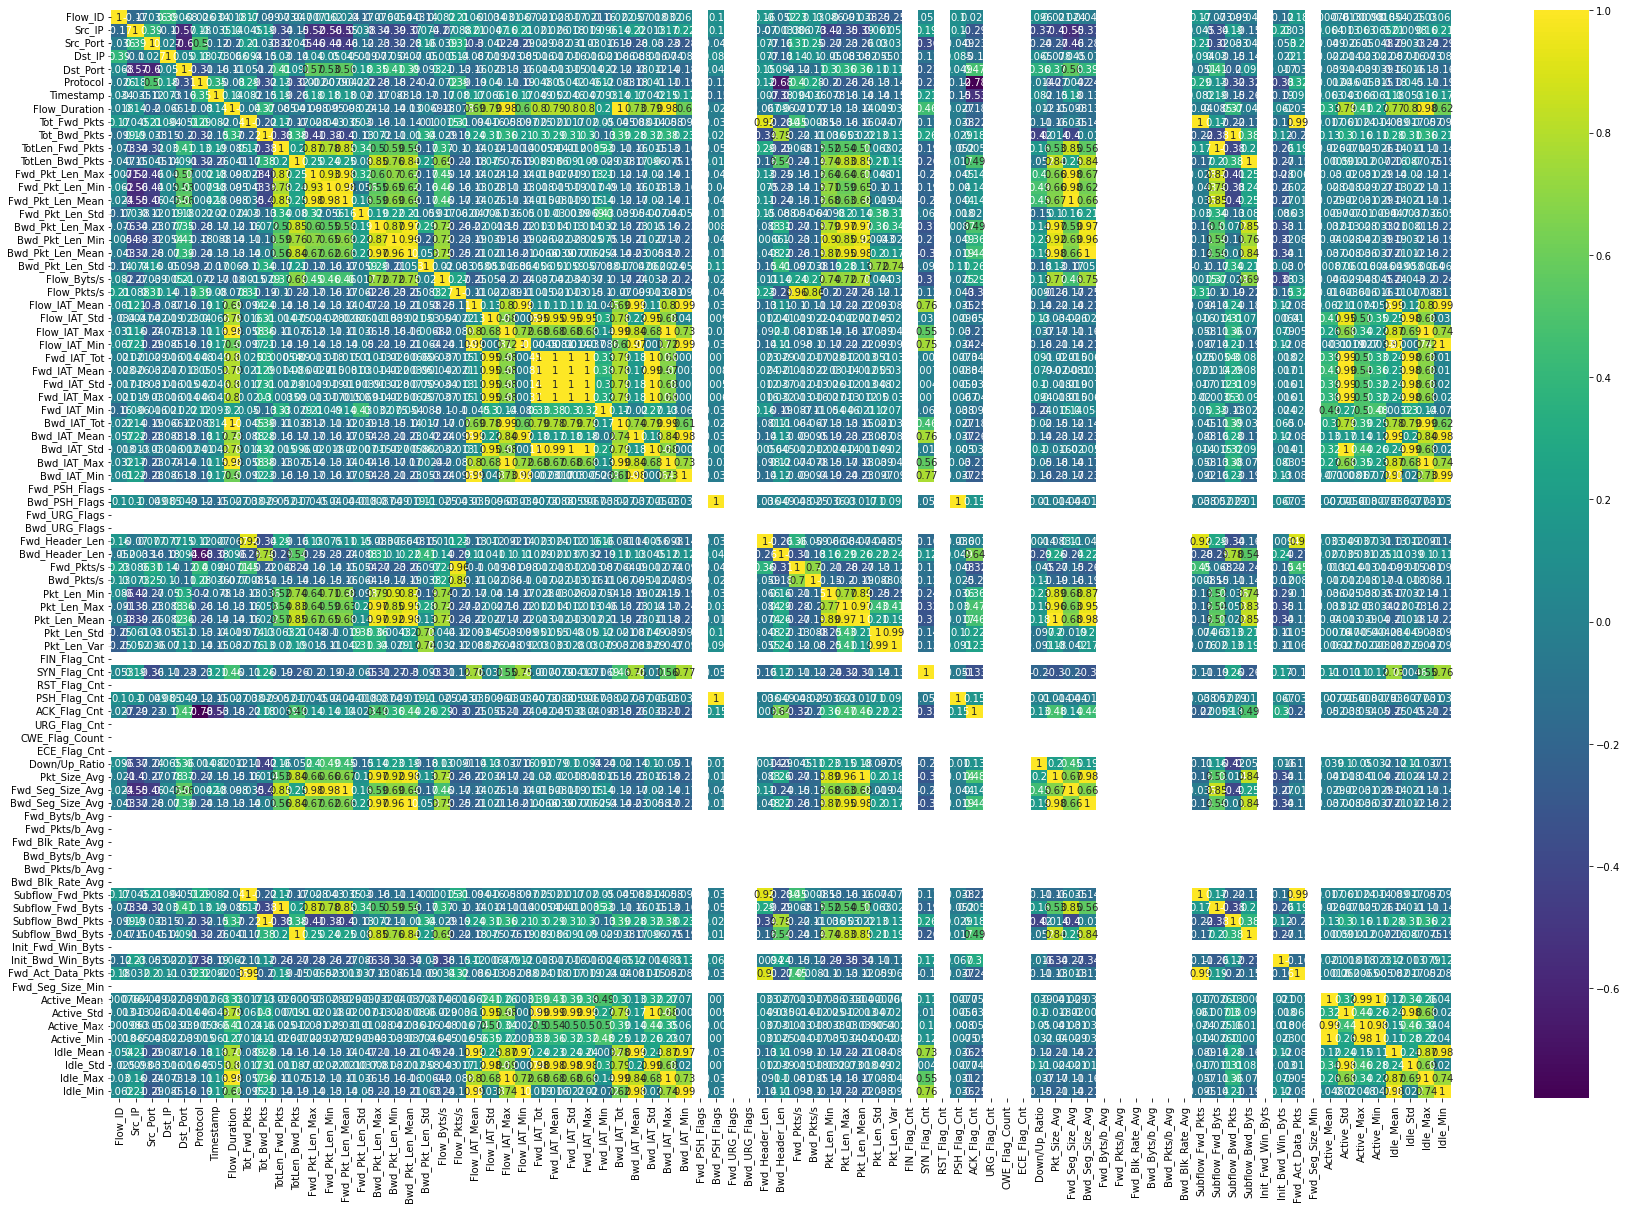

In [176]:
plt.figure(figsize=(30,20))
sns.heatmap(df_corr, annot=True, cmap=plt.cm.viridis)
plt.savefig('corr_mat.png')
plt.show()

In [177]:
high_corr_var=np.where(df_corr>0.95)

In [178]:
high_corr_var=[(df_corr.columns[x],df_corr.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [179]:
high_corr_var

[('Flow_Duration', 'Flow_IAT_Max'),
 ('Flow_Duration', 'Bwd_IAT_Tot'),
 ('Flow_Duration', 'Bwd_IAT_Max'),
 ('Flow_Duration', 'Idle_Max'),
 ('Tot_Fwd_Pkts', 'Subflow_Fwd_Pkts'),
 ('Tot_Fwd_Pkts', 'Fwd_Act_Data_Pkts'),
 ('Tot_Bwd_Pkts', 'Subflow_Bwd_Pkts'),
 ('TotLen_Fwd_Pkts', 'Subflow_Fwd_Byts'),
 ('TotLen_Bwd_Pkts', 'Subflow_Bwd_Byts'),
 ('Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Mean'),
 ('Fwd_Pkt_Len_Max', 'Fwd_Seg_Size_Avg'),
 ('Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean'),
 ('Fwd_Pkt_Len_Min', 'Fwd_Seg_Size_Avg'),
 ('Fwd_Pkt_Len_Mean', 'Fwd_Seg_Size_Avg'),
 ('Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Mean'),
 ('Bwd_Pkt_Len_Max', 'Pkt_Len_Max'),
 ('Bwd_Pkt_Len_Max', 'Pkt_Len_Mean'),
 ('Bwd_Pkt_Len_Max', 'Pkt_Size_Avg'),
 ('Bwd_Pkt_Len_Max', 'Bwd_Seg_Size_Avg'),
 ('Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean'),
 ('Bwd_Pkt_Len_Min', 'Bwd_Seg_Size_Avg'),
 ('Bwd_Pkt_Len_Mean', 'Pkt_Len_Mean'),
 ('Bwd_Pkt_Len_Mean', 'Pkt_Size_Avg'),
 ('Bwd_Pkt_Len_Mean', 'Bwd_Seg_Size_Avg'),
 ('Flow_Pkts/s', 'Fwd_Pkts/s'),
 ('Flow_IAT_Mea

In [180]:
df_new = df_new.drop(['Flow_Duration', 'Fwd_IAT_Std', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'Fwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Mean', 'Pkt_Size_Avg', 'Fwd_IAT_Tot', 'Fwd_IAT_Std', 'Fwd_IAT_Std', 'Bwd_IAT_Tot', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_PSH_Flags', 'Bwd_Header_Len', 'Pkt_Len_Std', 'Pkt_Size_Avg', 'Subflow_Fwd_Pkts', 'Active_Std', 'Idle_Mean' ],axis=1)

In [181]:
df_new.head(2)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Max,Active_Min,Idle_Std,Idle_Max,Idle_Min
281535,259,2,443,25,43238,6,617,1441.0,1441.0,1441.0,...,-1,252,1,0,0.0,0.0,0.0,0.0,78.0,78.0
203639,259,2,443,25,43238,6,574,1441.0,1441.0,1441.0,...,-1,252,1,0,0.0,0.0,0.0,0.0,182.0,182.0


In [182]:
from sklearn.preprocessing import StandardScaler
x=df_new.values
x = StandardScaler().fit_transform(x)

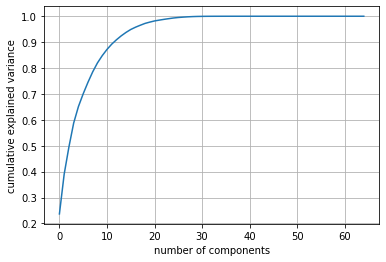

In [183]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA().fit(x)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('PCA_IoTID20')

In [184]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5', 'principal component 6','principal component 7', 'principal component 8','principal component 9', 'principal component 10','principal component 11', 'principal component 12','principal component 13', 'principal component 14','principal component 15', 'principal component 16','principal component 17', 'principal component 18','principal component 19', 'principal component 20'])

In [185]:
y=principalDf.values

In [186]:
clustering = OPTICS(min_samples=2,max_eps=np.inf,metric='chebyshev',cluster_method='xi').fit(y)
labels=clustering.labels_
no_clusters = len(np.unique(labels))
no_clusters

282

In [187]:
labels.shape

(1000,)

In [188]:
homogeneity_score(q, labels)

0.8195143525320053

In [189]:
no_noise = np.sum(np.array(labels) == -1, axis=0)
no_noise

181

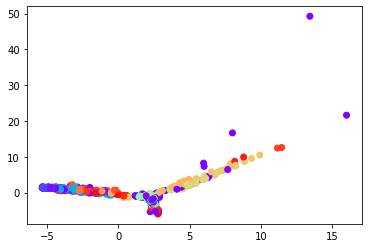

In [190]:
plt.scatter(y[:,0],y[:,1], c = labels, cmap='rainbow') 

In [191]:
index_cluster_0=np.where(labels==0)[0]
index_cluster_0

array([  0, 374, 865])

In [192]:
index_cluster_1=np.where(labels==1)[0]
index_cluster_1

array([217, 805])

In [193]:
index_cluster_2=np.where(labels==2)[0]
index_cluster_2

array([ 43, 111, 162, 227, 559])

In [194]:
index_cluster_3=np.where(labels==3)[0]
index_cluster_3

array([250, 355, 527])

In [195]:
index_cluster_4=np.where(labels==4)[0]
index_cluster_4

array([469, 476])

#### DT Classifier for IoT ID20 Dataset

In [196]:
df_new = df
df_new.head(2)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding


In [197]:
df_new= df_new.drop(['Cat','Sub_Cat'],axis=1)

In [198]:
cat_feature = df_new.select_dtypes(include=['category', object]).columns
df_new[cat_feature] = df_new[cat_feature].apply(LabelEncoder().fit_transform)
df_new.head(3)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,12446,25883,10000,203,10101,17,3496,75,1,1,...,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,0
1,22760,34617,2179,200,554,6,3664,5310,1,2,...,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,0
2,12691,25886,52727,200,9020,6,2082,141,0,3,...,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,0


In [199]:
df_new = df_new.replace([np.inf, -np.inf], np.nan).dropna()
df_new.head(3)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,12446,25883,10000,203,10101,17,3496,75,1,1,...,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,0
1,22760,34617,2179,200,554,6,3664,5310,1,2,...,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,0
2,12691,25886,52727,200,9020,6,2082,141,0,3,...,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,0


In [200]:
df_new.shape

(625415, 84)

In [201]:
df_new = df_new.drop(['Flow_Duration', 'Fwd_IAT_Std', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'Fwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Mean', 'Pkt_Size_Avg', 'Fwd_IAT_Tot', 'Fwd_IAT_Std', 'Fwd_IAT_Std', 'Bwd_IAT_Tot', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_PSH_Flags', 'Bwd_Header_Len', 'Pkt_Len_Std', 'Pkt_Size_Avg', 'Subflow_Fwd_Pkts', 'Active_Std', 'Idle_Mean' ],axis=1)

In [202]:
df_new.shape

(625415, 66)

In [203]:
y = df_new.Label
X = df_new.drop(['Label'],axis=1)

In [204]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [205]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [206]:
dt_score = dt.score(X_test,y_test)
dt_score

0.999925383077948

In [207]:
y_pred = dt.predict(X_test)

In [208]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[175553      4]
 [    10  12058]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    175557
           1       1.00      1.00      1.00     12068

    accuracy                           1.00    187625
   macro avg       1.00      1.00      1.00    187625
weighted avg       1.00      1.00      1.00    187625



In [209]:
cf_matrix= confusion_matrix(y_test, y_pred)
cf_matrix

array([[175553,      4],
       [    10,  12058]])

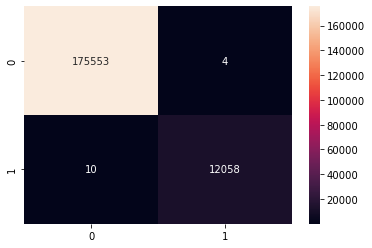

In [210]:
import seaborn as sns
# group_names = ['True Neg','False Pos','False Neg','True Pos']
# group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
# labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
# labels = np.asarray(labels).reshape(2,2)
import matplotlib.pyplot as plt

sns.heatmap(cf_matrix, annot=True, fmt='')
plt.savefig("plots_IoTID20.pdf")

In [211]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
rnd.fit(X_train,y_train)
rnd_score = rnd.score(X_test,y_test)
rnd_score

0.9999200532978014

#### Cross-Validation Accuracy Comparison:

In [212]:
algo_name = ['RandomForest','Decision Tree']
acc_df = pd.DataFrame({'Algorithm' : algo_name, 'Accuracy %' : [rnd_score,dt_score] })
acc_df = acc_df.sort_values(by='Accuracy %', ascending = False)
acc_df = acc_df.reset_index(drop=True)
acc_df

,Algorithm,Accuracy %
0,Decision Tree,0.999925
1,RandomForest,0.999920


## Results

The OPTICS clustering algorithm and the DT classifier are implemented using the pythons sci-kit learn library. I took 1000 samples from each dataset randomly to conduct OPTICS clustering operations since my experimental configuration fails to do clustering for the entire dataset. We set min_samples=2, max_eps=np.inf, metric=' chebyshev', cluster_method ='xi' for the OPTICS clustering method's parameters. We found that for the 'chebyshev' distance metric the OPTICS yields good results.

| Metric | Number of Clusters | Homogeneity_Score
| :- | -: | -: |
|chebyshev|191| 56.22%|
|minkowski|184| 72.26%|
|correlation|234| 72.31%|

On the other hand, for classification algorithm, my environment supported the entire dataset. I split the entire dataset to a 70 : 30 ratio for training and testing the DT classifier.

Once my trained model is working, I tested my model with other two dataset, "UNSW-NB15_2.csv" and "UNSW-NB15_3.csv". 

#### Discussion

- Before applying the ML models on the datasets, I performed data preprocessing. First, the categorical features are encoded using LabeIEncoder() function and normalized using StandardScaler() function. Both of the datasets are high dimensional. Therefore, I conducted a correlation analysis and found that 8 pairs of features are highly correlated with each other in the UNSW-NB15 dataset. However, among the 8 pairs of features, only ('swin', 'dwin'), ('Stime', 'Ltime') pairs of feature showed 100% correlation. Therefore, from UNSW- NB15 dataset 'swin' and 'Stime' features are dropped.

- To further reduce the dimensions of the datasets, I applied Principle Component Analysis (PCA). From PCA, I found it is sufficient to consider only the first 30 principal components to represent the overall information of the UNSW- NB15 dataset.

#### New Findings:

According to [Arifeen, Murshedul, Petrovski, et al., 2021], DT Classifier gives the best accuracy. But After using other classifiers and a combination of various parameters, I find that <b>RandomForestClassifier(n_estimators = 100, criterion = 'entropy')</b> gives the best accuracy for both USNW-NB14 and IoT ID20 datasets and a table of comparison is shown above.

Similarly, I have been using various other metrics for the OPTICS Clustering method. I found that the highest Homogeneity Score can be achieved if we use, <b>OPTICS(min_samples=2,max_eps=np.inf,metric='correlation',cluster_method='xi')</b>.

## Conclusions

While doing the project I learned about various topics and concepts of Machine Learning such as,

1. About various classifiers and use of the classifier. 
2. I learned about Principal Component Analysis, a popular unsupervised learning technique for reducing the dimensionality of data. I have used it here to reduce the dimensionality of my data set.
3. I learned about Linear encoding. I used it to label non-numeric data into numeric ones. So that I can use it to train and test my model.
4. Neural Networks and impacts of using good weight and hidden layers. I used various hidden layers and activation function combinations to get the best result. But during my testing, all the accuracies are below Random Forest or DT. So, I included only one type of Neural Network. 
5. According to [Arifeen, Murshedul, Petrovski, et al., 2021], metric = “Chebyshev” gives the best cluster and homogeneity score but in my experiment, it shows that metric = “correlation” gives the best homogeneity score.
6. I have learned a lot about sklearn libraries. I used various classifiers in this project and found that with the Random Forest we can get the best accuracy.

### References

* [Arifeen, Murshedul, Petrovski, et al., 2021] Arifeen, Murshedul, Andrei Petrovski, and Sergei Petrovski. "Automated Microsegmentation for Lateral Movement Prevention in Industrial Internet of Things (IIoT)." 2021 14th International Conference on Security of Information and Networks (SIN). Vol. 1. IEEE, 2021.

* [Ullah, Mahmoud, et al., 2020] I. Ullah and Q. H. Mahmoud, "A scheme for generating a dataset for anomalous activity detection in iot networks," in Canadian Conference on Artificial Intelligence. Springer, 2020, pp. 508-520

* [Moustafa, Nour, Jill, et al., 2015] Moustafa, Nour, and Jill Slay. "UNSW-NB15: a comprehensive data set for network intrusion detection systems (UNSW-NB15 network data set)." 2015 military communications and information systems conference (MilCIS). IEEE, 2015.

* [Howley, Tom, et al.] "The effect of principal component analysis on machine learning accuracy with high dimensional spectral data." International Conference on Innovative Techniques and Applications of Artificial Intelligence. Springer, London, 2005.

* [Erman, Arlitt, Arlitt, et al., 2006] J. Erman, M. Arlitt, and A. Arlitt, "Traffic classification using clustering algorithms," in Proceedings ofthe 2006 SIGCOMM workshop on Mining network data, 2006, pp. 281-286.

* .[optics]"sklearn.cluster.optics." [Online]. Available: https://scikit- learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html

* [Ankerst, Mihael, Markus, Breunig, Kriegel, Sander et al., 1999] Ankerst, Mihael, Markus M. Breunig, Hans-Peter Kriegel, and Jörg Sander. “OPTICS: ordering points to identify the clustering structure.” ACM SIGMOD Record 28, no. 2 (1999): 49-60.

* .[Random Forest]"sklearn.cluster.RandomForestClassifier." [Online]. Available:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

* .[Nerual Network]"sklearn.cluster.MLPClassifier." [Online]. Available:https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [216]:
import io
import nbformat
import glob
nbfile = glob.glob('Rakesh Podder - Project.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file Rakesh Podder - Project.ipynb is 2091
